<a href="https://colab.research.google.com/github/boropx999/hello-world/blob/main/FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


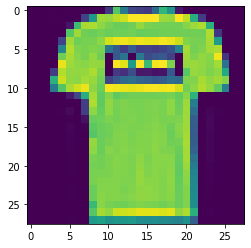

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()

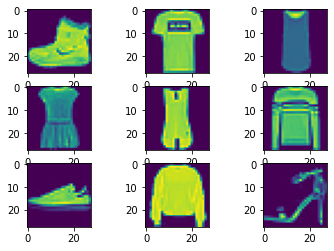

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i],)
              #cmap = plt.get_cmap = ('gray'))
plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:

import numpy as np
from keras.utils import np_utils
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test= x_test.astype('float32')
x_train/= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(512,activation = 'relu', input_shape = (784,)))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
from sklearn.utils import validation
# MSE là sai số bình phương trung bình, 
# Gán biến lại để nữa vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học 128 dữ liệu (batch_size), khi sai số không thay đổi trong 50 lần học thì sẽ dừng học ngay
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience = 50)])

Epoch 1/500
375/375 [==============================] - 4s 11ms/step - loss: 0.3491 - accuracy: 0.8715 - val_loss: 0.3296 - val_accuracy: 0.8807
Epoch 2/500
375/375 [==============================] - 4s 10ms/step - loss: 0.3283 - accuracy: 0.8786 - val_loss: 0.3391 - val_accuracy: 0.8789
Epoch 3/500
375/375 [==============================] - 4s 10ms/step - loss: 0.3129 - accuracy: 0.8850 - val_loss: 0.3397 - val_accuracy: 0.8789
Epoch 4/500
375/375 [==============================] - 4s 10ms/step - loss: 0.3000 - accuracy: 0.8897 - val_loss: 0.3282 - val_accuracy: 0.8866
Epoch 5/500
375/375 [==============================] - 4s 10ms/step - loss: 0.2912 - accuracy: 0.8915 - val_loss: 0.3368 - val_accuracy: 0.8869
Epoch 6/500
375/375 [==============================] - 4s 10ms/step - loss: 0.2804 - accuracy: 0.8950 - val_loss: 0.3758 - val_accuracy: 0.8793
Epoch 7/500
375/375 [==============================] - 4s 10ms/step - loss: 0.2733 - accuracy: 0.8999 - val_loss: 0.3339 - val_accuracy:

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 0)
print('Test lost', score[0])
print('Test accuracy', score[1])

Test lost 0.7612714767456055
Test accuracy 0.8880000114440918


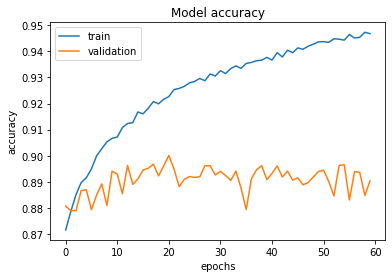

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()